# Basic Bayesian Inference

Statistical inference is a process of learning from incomplete or imperfect (error-contaminated) data. Can account for this "imperfection" using either a sampling model or a measurement error model.

### Statistical hypothesis testing

The *de facto* standard for statistical inference is statistical hypothesis testing. The goal of hypothesis testing is to evaluate a **null hypothesis**. There are two possible outcomes:

- reject the null hypothesis
- fail to reject the null hypothesis

Rejection occurs when a chosen test statistic is higher than some pre-specified threshold valuel; non-rejection occurs otherwise.

![](images/test_stats.png)

Notice that neither outcome says anything about the quantity of interest, the **research hypothesis**. 

Setting up a statistical test involves several subjective choices by the user that are rarely justified based on the problem or decision at hand:

- statistical test to use
- null hypothesis to test
- significance level

Choices are often based on arbitrary criteria, including "statistical tradition" (Johnson 1999). The resulting evidence is indirect, incomplete, and typically overstates the evidence against the null hypothesis (Goodman 1999).

Most importantly to applied users, the results of statistical hypothesis tests are very easy to misinterpret. 

### Estimation 

Instead of testing, a more informative and effective approach for inference is based on **estimation** (be it frequentist or Bayesian). That is, rather than testing whether two groups are different, we instead pursue an estimate of *how different* they are, which is fundamentally more informative. 

Additionally, we include an estimate of **uncertainty** associated with that difference which includes uncertainty due to our lack of knowledge of the model parameters (*epistemic uncertainty*) and uncertainty due to the inherent stochasticity of the system (*aleatory uncertainty*).

# An Introduction to Bayesian Statistical Analysis

Though many of you will have taken a statistics course or two during your undergraduate (or graduate education, most of those who have will likely not have had a course in *Bayesian* statistics. Most introductory courses, particularly for non-statisticians, still do not cover Bayesian methods at all. Even today, Bayesian courses (similarly to statistical computing courses!) are typically tacked onto the curriculum, rather than being integrated into the program.

In fact, Bayesian statistics is not just a particular method, or even a class of methods; it is an entirely **different paradigm** for doing statistical analysis.

> Practical methods for making inferences from data using probability models for quantities we observe and about which we wish to learn.
*-- Gelman et al. 2013*

A Bayesian model is described by parameters, uncertainty in those parameters is described using probability distributions.

All conclusions from Bayesian statistical procedures are stated in terms of **probability statements**

![prob model](images/prob_model.png)

This confers several benefits to the analyst, including:

- ease of interpretation, summarization of uncertainty
- can incorporate uncertainty in parent parameters
- easy to calculate summary statistics

### Bayesian vs Frequentist Statistics: *What's the difference?*

Any statistical inferece paradigm, Bayesian or otherwise, involves at least the following: 

1. Some **unknown quantities** about which we are interested in learning or testing. We call these *parameters*.
2. Some **data** which have been observed, and hopefully contain information about.
3. One or more **models** that relate the data to the parameters, and is the instrument that is used to learn.



### The Frequentist World View

![Fisher](images/fisher.png)

- The **data** that have been observed are considered **random**, because they are realizations of random processes, and hence will vary each time one goes to observe the system.
- Model **parameters** are considered **fixed**. A parameter's true value is uknown and fixed, and so we *condition* on them.

In mathematical notation, this implies a (very) general model of the following form:

<div style="font-size:35px">
\\[f(y | \theta)\\]
</div>

Here, the model \\(f\\) accepts data values \\(y\\) as an argument, conditional on particular values of \\(\theta\\).

Frequentist inference typically involves deriving **estimators** for the unknown parameters. Estimators are formulae that return estimates for particular estimands, as a function of data. They are selected based on some chosen optimality criterion, such as *unbiasedness*, *variance minimization*, or *efficiency*.

> For example, lets say that we have collected some data on the prevalence of autism spectrum disorder (ASD) in some defined population. Our sample includes \\(n\\) sampled children, \\(y\\) of them having been diagnosed with autism. A frequentist estimator of the prevalence \\(p\\) is:

> <div style="font-size:25px">
> $$\hat{p} = \frac{y}{n}$$
> </div>

> Why this particular function? Because it can be shown to be unbiased and minimum-variance.

It is important to note that, in a frequentist world, new estimators need to be derived for every estimand that is introduced.

### The Bayesian World View

![Bayes](images/bayes.png)

- Data are considered **fixed**. They used to be random, but once they were written into your lab notebook/spreadsheet/IPython notebook they do not change.
- Model parameters themselves may not be random, but Bayesians use probability distribtutions to describe their uncertainty in parameter values, and are therefore treated as **random**. In some cases, it is useful to consider parameters as having been sampled from probability distributions.

This implies the following form:

## $$p(\theta | y)$$

This formulation used to be referred to as ***inverse probability***, because it infers from observations to parameters, or from effects to causes.

Bayesians do not seek new estimators for every estimation problem they encounter. There is only one estimator for Bayesian inference: **Bayes' Formula**.

## Bayes' Formula

Now that we have some probability under our belt, we turn to Bayes' formula. While frequentist statistics uses different estimators for different problems, Bayes formula is the **only estimator** that Bayesians need to obtain estimates of unknown quantities that we care about. 

![bayes formula](images/bayes_formula.png)

The equation expresses how our belief about the value of \\(\theta\\), as expressed by the **prior distribution** \\(P(\theta)\\) is reallocated following the observation of the data \\(y\\).

The innocuous denominator \\(P(y)\\) usuallt cannot be computed directly, and is actually the expression in the numerator, integrated over all \\(\theta\\):

<div style="font-size: 150%;">  
\\[Pr(\theta|y) = \frac{Pr(y|\theta)Pr(\theta)}{\int Pr(y|\theta)Pr(\theta) d\theta}\\]
</div>

The intractability of this integral is one of the factors that has contributed to the under-utilization of Bayesian methods by statisticians.

### Priors

Once considered a controversial aspect of Bayesian analysis, the prior distribution characterizes what is known about an unknown quantity before observing the data from the present study. Thus, it represents the information state of that parameter. It can be used to reflect the information obtained in previous studies, to constrain the parameter to plausible values, or to represent the population of possible parameter values, of which the current study's parameter value can be considered a sample.

### Likelihood functions

The likelihood represents the information in the observed data, and is used to update prior distributions to posterior distributions. This updating of belief is justified becuase of the **likelihood principle**, which states:

> Following observation of \\(y\\), the likelihood \\(L(\theta|y)\\) contains all experimental information from \\(y\\) about the unknown \\(\theta\\).

Bayesian analysis satisfies the likelihood principle because the posterior distribution's dependence on the data is **only through the likelihood**. In comparison, most frequentist inference procedures violate the likelihood principle, because inference will depend on the design of the trial or experiment.

Remember from the density estimation section that the likelihood is closely related to the probability density (or mass) function. The difference is that the likelihood varies the parameter while holding the observations constant, rather than *vice versa*.

## Bayesian Inference, in 3 Easy Steps

![123](images/123.png)

Gelman et al. (2013) describe the process of conducting Bayesian statistical analysis in 3 steps.

### Step 1: Specify a probability model

As was noted above, Bayesian statistics involves using probability models to solve problems. So, the first task is to *completely specify* the model in terms of probability distributions. This includes everything: unknown parameters, data, covariates, missing data, predictions. All must be assigned some probability density.

This step involves making choices.

- what is the form of the sampling distribution of the data?
- what form best describes our uncertainty in the unknown parameters?

### Discrete Random Variables

$$X = \{0,1\}$$

$$Y = \{\ldots,-2,-1,0,1,2,\ldots\}$$

**Probability Mass Function**: 

For discrete $X$,

$$Pr(X=x) = f(x|\theta)$$

![Discrete variable](http://upload.wikimedia.org/wikipedia/commons/1/16/Poisson_pmf.svg)

***e.g. Poisson distribution***

The Poisson distribution models unbounded counts:

<div style="font-size: 150%;">  
$$Pr(X=x)=\frac{e^{-\lambda}\lambda^x}{x!}$$
</div>

* $X=\{0,1,2,\ldots\}$
* $\lambda > 0$

$$E(X) = \text{Var}(X) = \lambda$$

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425

In [2]:
from pymc3 import Poisson

x = Poisson.dist(mu=1)
samples = x.random(size=10000)

In [3]:
samples.mean()

0.9859

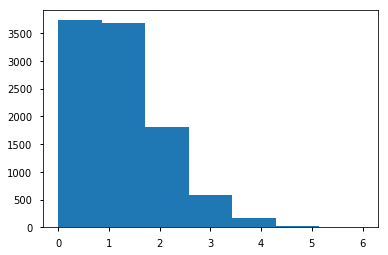

In [4]:
plt.hist(samples, bins=len(set(samples)));

### Continuous Random Variables

$$X \in [0,1]$$

$$Y \in (-\infty, \infty)$$

**Probability Density Function**: 

For continuous $X$,

$$Pr(x \le X \le x + dx) = f(x|\theta)dx \, \text{ as } \, dx \rightarrow 0$$

![Continuous variable](https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg)

***e.g. normal distribution***

<div style="font-size: 150%;">  
$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$
</div>

* $X \in \mathbf{R}$
* $\mu \in \mathbf{R}$
* $\sigma>0$

$$\begin{align}
E(X) &= \mu \cr
\text{Var}(X) &= \sigma^2 
\end{align}$$

In [5]:
from pymc3 import Normal

y = Normal.dist(mu=-2, sd=4)
samples = y.random(size=10000)

In [6]:
samples.mean()

-2.0303670533348503

In [7]:
samples.std()

3.972885354039681

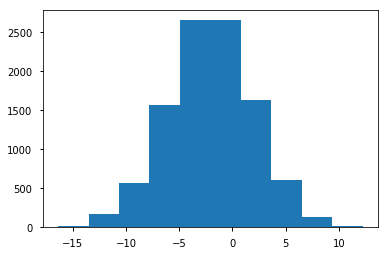

In [8]:
plt.hist(samples);

### Step 2: Calculate a posterior distribution

The mathematical form \\(p(\theta | y)\\) that we associated with the Bayesian approach is referred to as a **posterior distribution**.

> posterior /pos·ter·i·or/ (pos-tēr´e-er) later in time; subsequent.

Why posterior? Because it tells us what we know about the unknown \\(\theta\\) *after* having observed \\(y\\).

This posterior distribution is formulated as a function of the probability model that was specified in Step 1. Usually, we can write it down but we cannot calculate it analytically. In fact, the difficulty inherent in calculating the posterior distribution for most models of interest is perhaps the major contributing factor for the lack of widespread adoption of Bayesian methods for data analysis. Various strategies for doing so comprise this tutorial.

**But**, once the posterior distribution is calculated, you get a lot for free:

- point estimates
- credible intervals
- quantiles
- predictions

### Step 3: Check your model

Though frequently ignored in practice, it is critical that the model and its outputs be assessed before using the outputs for inference. Models are specified based on assumptions that are largely unverifiable, so the least we can do is examine the output in detail, relative to the specified model and the data that were used to fit the model.

Specifically, we must ask:

- does the model fit data?
- are the conclusions reasonable?
- are the outputs sensitive to changes in model structure?



## References and Resources

- Goodman, S. N. (1999). Toward evidence-based medical statistics. 1: The P value fallacy. Annals of Internal Medicine, 130(12), 995–1004. http://doi.org/10.7326/0003-4819-130-12-199906150-00008
- Johnson, D. (1999). The insignificance of statistical significance testing. Journal of Wildlife Management, 63(3), 763–772.
- Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). Bayesian Data Analysis, Third Edition. CRC Press.